In [1]:
#IMPORT & SETUP
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import os

# Display plots inline
%matplotlib inline

In [2]:
# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
#LOAD FILES
# Define the relative path to the stories folder
stories_path = '../data/Part_1/'

# Dictionary to store all texts
texts = {}

# Load all 5 story files
for i in range(1, 6):
    filename = f'0{i}.txt'
    filepath = os.path.join(stories_path, filename)
    
    with open(filepath, 'r', encoding='utf-8') as f:
        texts[filename] = f.read()

# Verify files were loaded correctly
print("Files loaded successfully:")
for filename, content in texts.items():
    print(f"  - {filename}: {len(content)} characters")

Files loaded successfully:
  - 01.txt: 1564 characters
  - 02.txt: 3325 characters
  - 03.txt: 10615 characters
  - 04.txt: 6387 characters
  - 05.txt: 20928 characters


## Part 1: Sentence Splitting and Word Tokenization

In [4]:
# SENTENCE TOKENIZATION

# Dictionary to store sentences for each story
sentences = {}

for filename, content in texts.items():
    sentences[filename] = sent_tokenize(content)

# Report sentence statistics
print("Sentence count per story:")

total_sentences = 0
for filename, sents in sentences.items():
    count = len(sents)
    total_sentences += count
    print(f"{filename}: {count} sentences")

print(f"TOTAL: {total_sentences} sentences")

Sentence count per story:
01.txt: 11 sentences
02.txt: 20 sentences
03.txt: 182 sentences
04.txt: 90 sentences
05.txt: 224 sentences
TOTAL: 527 sentences


In [5]:
# WORD TOKENIZATION

# Dictionary to store word tokens for each story
tokens = {}

for filename, content in texts.items():
    tokens[filename] = word_tokenize(content)

# Report token statistics
print("Token count per story:")

total_tokens = 0
for filename, words in tokens.items():
    count = len(words)
    total_tokens += count
    print(f"{filename}: {count} tokens")

print(f"TOTAL: {total_tokens} tokens")

Token count per story:
01.txt: 352 tokens
02.txt: 779 tokens
03.txt: 2435 tokens
04.txt: 1325 tokens
05.txt: 4676 tokens
TOTAL: 9567 tokens


In [6]:
# WORD FREQUENCY ANALYSIS

# Dictionary to store word frequencies for each story
word_freq = {}

for filename, words in tokens.items():
    # Convert to lowercase only (keep punctuation)
    words_lower = [word.lower() for word in words]
    word_freq[filename] = Counter(words_lower)

# Display top 10 words per story as a preview
for filename, freq in word_freq.items():
    print(f"\n{filename} - Top 10 words:")
    for word, count in freq.most_common(10):
        print(f"'{word}': {count}")


01.txt - Top 10 words:
',': 30
'the': 17
'her': 12
'river': 11
'missy': 10
'a': 10
'.': 10
'and': 9
'to': 8
'was': 7

02.txt - Top 10 words:
',': 74
'she': 64
'’': 25
'her': 21
'the': 20
'.': 19
'him': 16
't': 15
'and': 14
'to': 13

03.txt - Top 10 words:
'.': 160
',': 105
'the': 80
'her': 56
'he': 56
'to': 55
'''': 51
'you': 47
'``': 47
'and': 47

04.txt - Top 10 words:
'.': 89
'the': 79
'to': 50
',': 42
'he': 42
'was': 30
'doctor': 30
'she': 25
'’': 24
'her': 23

05.txt - Top 10 words:
',': 310
'you': 254
'.': 214
'the': 133
'your': 122
'to': 112
'’': 109
'“': 89
'”': 89
'and': 84


In [7]:
# COMBINED WORD FREQUENCY (ALL STORIES)

# Combine all tokens from all stories (lowercase only)
all_tokens = []
for words in tokens.values():
    all_tokens.extend([word.lower() for word in words])

# Calculate total frequency
total_word_freq = Counter(all_tokens)

# Display top 25 words
print("Top 25 words across all stories:")
for word, count in total_word_freq.most_common(25):
    print(f"'{word}': {count}")

Top 25 words across all stories:
',': 561
'.': 492
'the': 329
'you': 307
'to': 238
'she': 214
'her': 191
'and': 176
'’': 163
'he': 141
'a': 140
'your': 122
'was': 115
'of': 109
'it': 104
'“': 104
'”': 104
'in': 88
'that': 88
'doctor': 83
't': 82
'i': 81
'his': 59
'with': 58
'but': 55


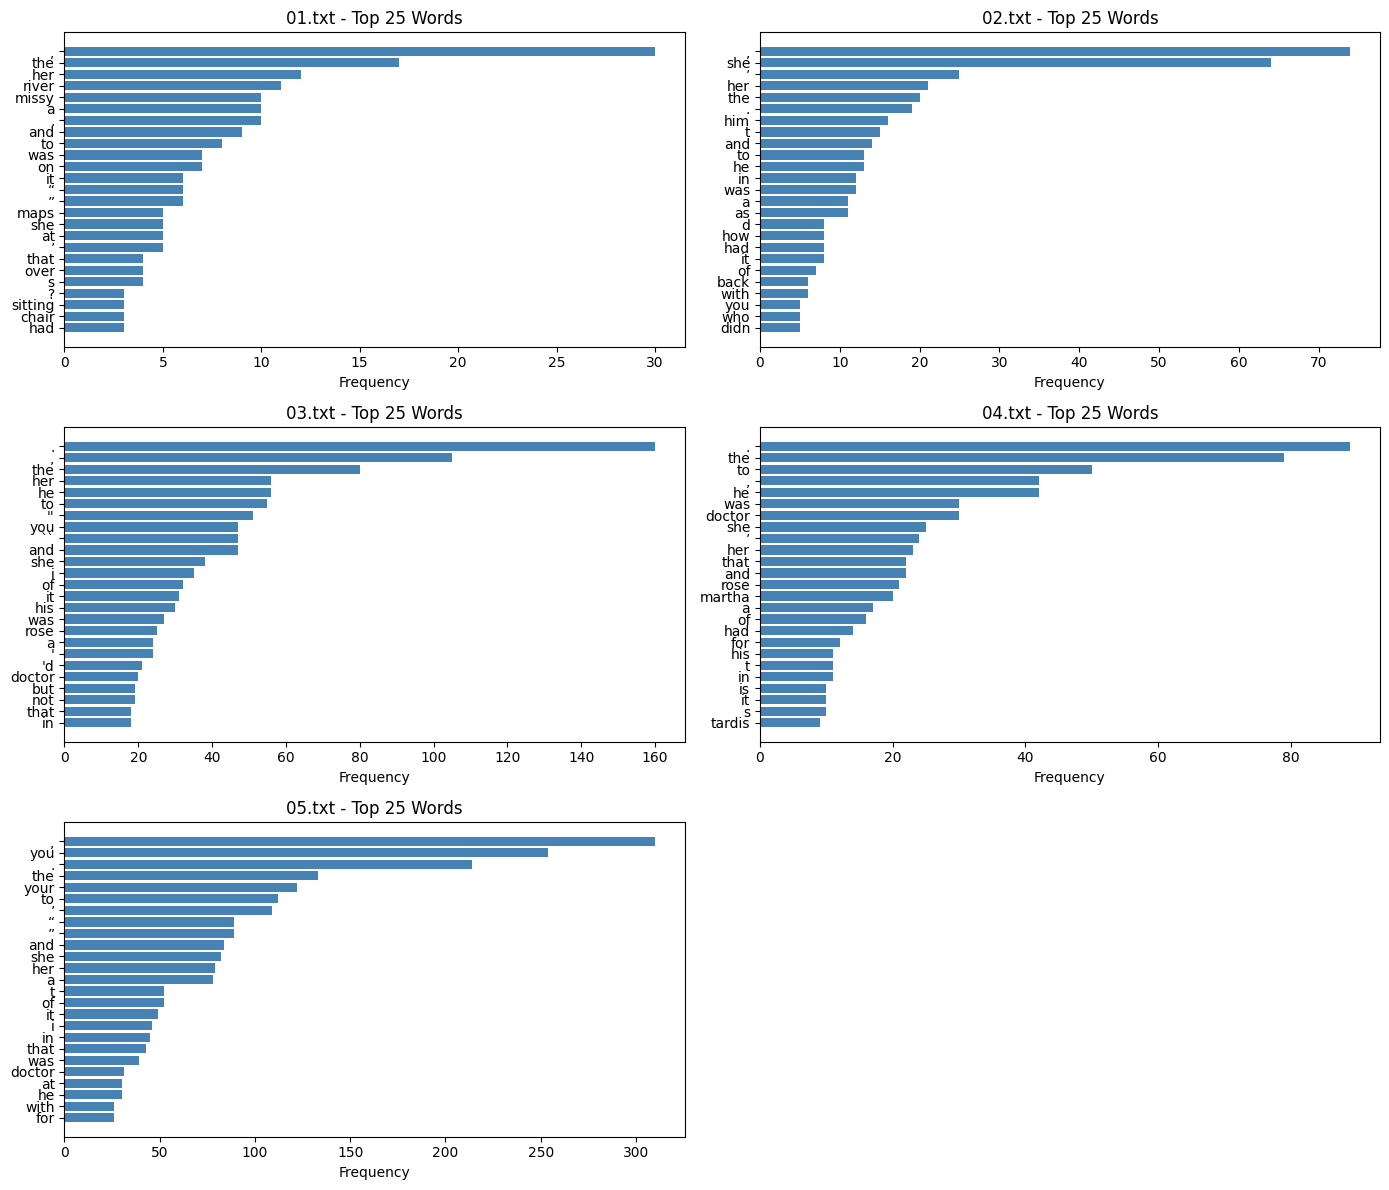

In [8]:
# HISTOGRAMS: TOP 25 WORDS PER STORY

# Create a figure with subplots for each story
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to easily iterate

for idx, (filename, freq) in enumerate(word_freq.items()):
    # Get top 25 words
    top_25 = freq.most_common(25)
    words = [word for word, count in top_25]
    counts = [count for word, count in top_25]
    
    # Plot histogram
    axes[idx].barh(words, counts, color='steelblue')
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_title(f'{filename} - Top 25 Words')
    axes[idx].invert_yaxis()  # Highest frequency at top

# Hide the 6th subplot (we only have 5 stories)
axes[5].axis('off')

plt.tight_layout()
plt.show()

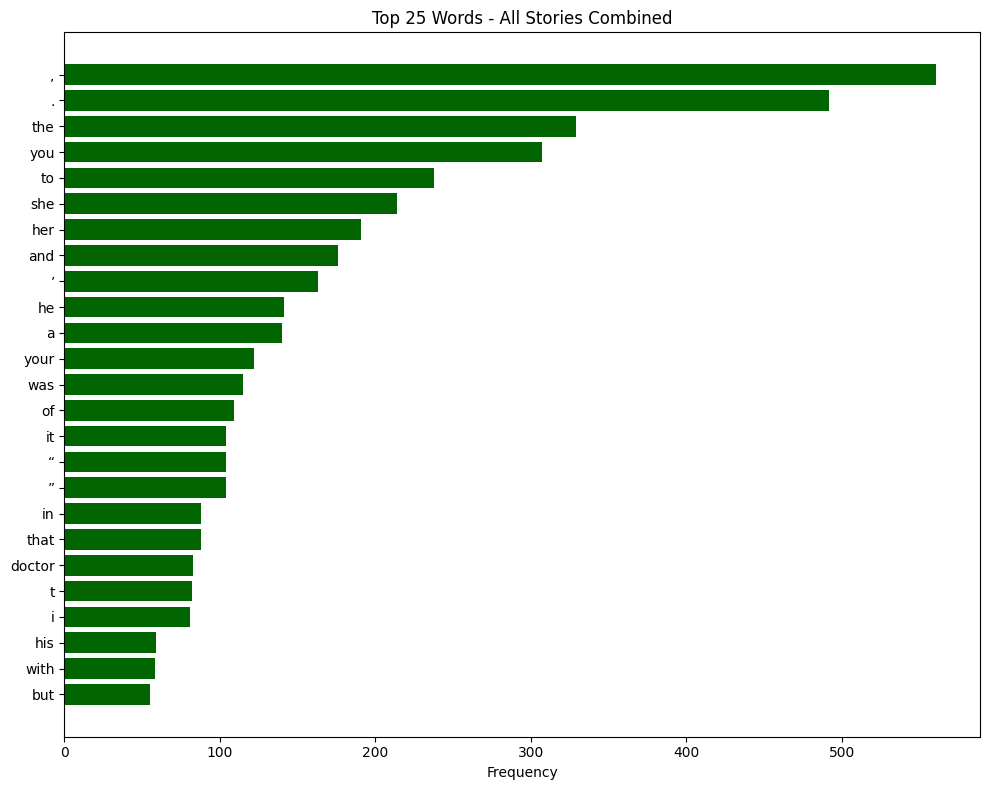

In [9]:
# HISTOGRAM: TOP 25 WORDS (ALL STORIES COMBINED)

# Get top 25 words from combined frequency
top_25_total = total_word_freq.most_common(25)
words = [word for word, count in top_25_total]
counts = [count for word, count in top_25_total]

# Plot histogram
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='darkgreen')
plt.xlabel('Frequency')
plt.title('Top 25 Words - All Stories Combined')
plt.gca().invert_yaxis()  # Highest frequency at top
plt.tight_layout()
plt.show()

## Part 2: Stemming Analysis (Porter vs Lancaster)

In [10]:
# STEMMING SETUP

# Initialize both stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()


In [11]:
# APPLY STEMMING TO ALL TEXTS

# Dictionaries to store stemmed frequencies
porter_freq = {}
lancaster_freq = {}

for filename, words in tokens.items():
    # Apply Porter stemmer (lowercase only)
    porter_stems = [porter.stem(word.lower()) for word in words]
    porter_freq[filename] = Counter(porter_stems)
    
    # Apply Lancaster stemmer (lowercase only)
    lancaster_stems = [lancaster.stem(word.lower()) for word in words]
    lancaster_freq[filename] = Counter(lancaster_stems)

# Verify it worked
print("Stemming applied successfully")
print(f"\nExample - 01.txt top 10 Porter stems:")
for stem, count in porter_freq['01.txt'].most_common(10):
    print(f"  '{stem}': {count}")

Stemming applied successfully

Example - 01.txt top 10 Porter stems:
  ',': 30
  'the': 17
  'her': 12
  'river': 11
  'missi': 10
  'a': 10
  '.': 10
  'and': 9
  'to': 8
  'wa': 7


In [12]:
# COMBINED STEMMED FREQUENCY (ALL STORIES)

# Combine all Porter stems
all_porter_stems = []
for words in tokens.values():
    all_porter_stems.extend([porter.stem(word.lower()) for word in words])

total_porter_freq = Counter(all_porter_stems)

# Combine all Lancaster stems
all_lancaster_stems = []
for words in tokens.values():
    all_lancaster_stems.extend([lancaster.stem(word.lower()) for word in words])

total_lancaster_freq = Counter(all_lancaster_stems)

# Compare unique counts
print("Unique token comparison:")
print(f"  Original words:    {len(total_word_freq)}")
print(f"  Porter stems:      {len(total_porter_freq)}")
print(f"  Lancaster stems:   {len(total_lancaster_freq)}")

Unique token comparison:
  Original words:    1736
  Porter stems:      1446
  Lancaster stems:   1359


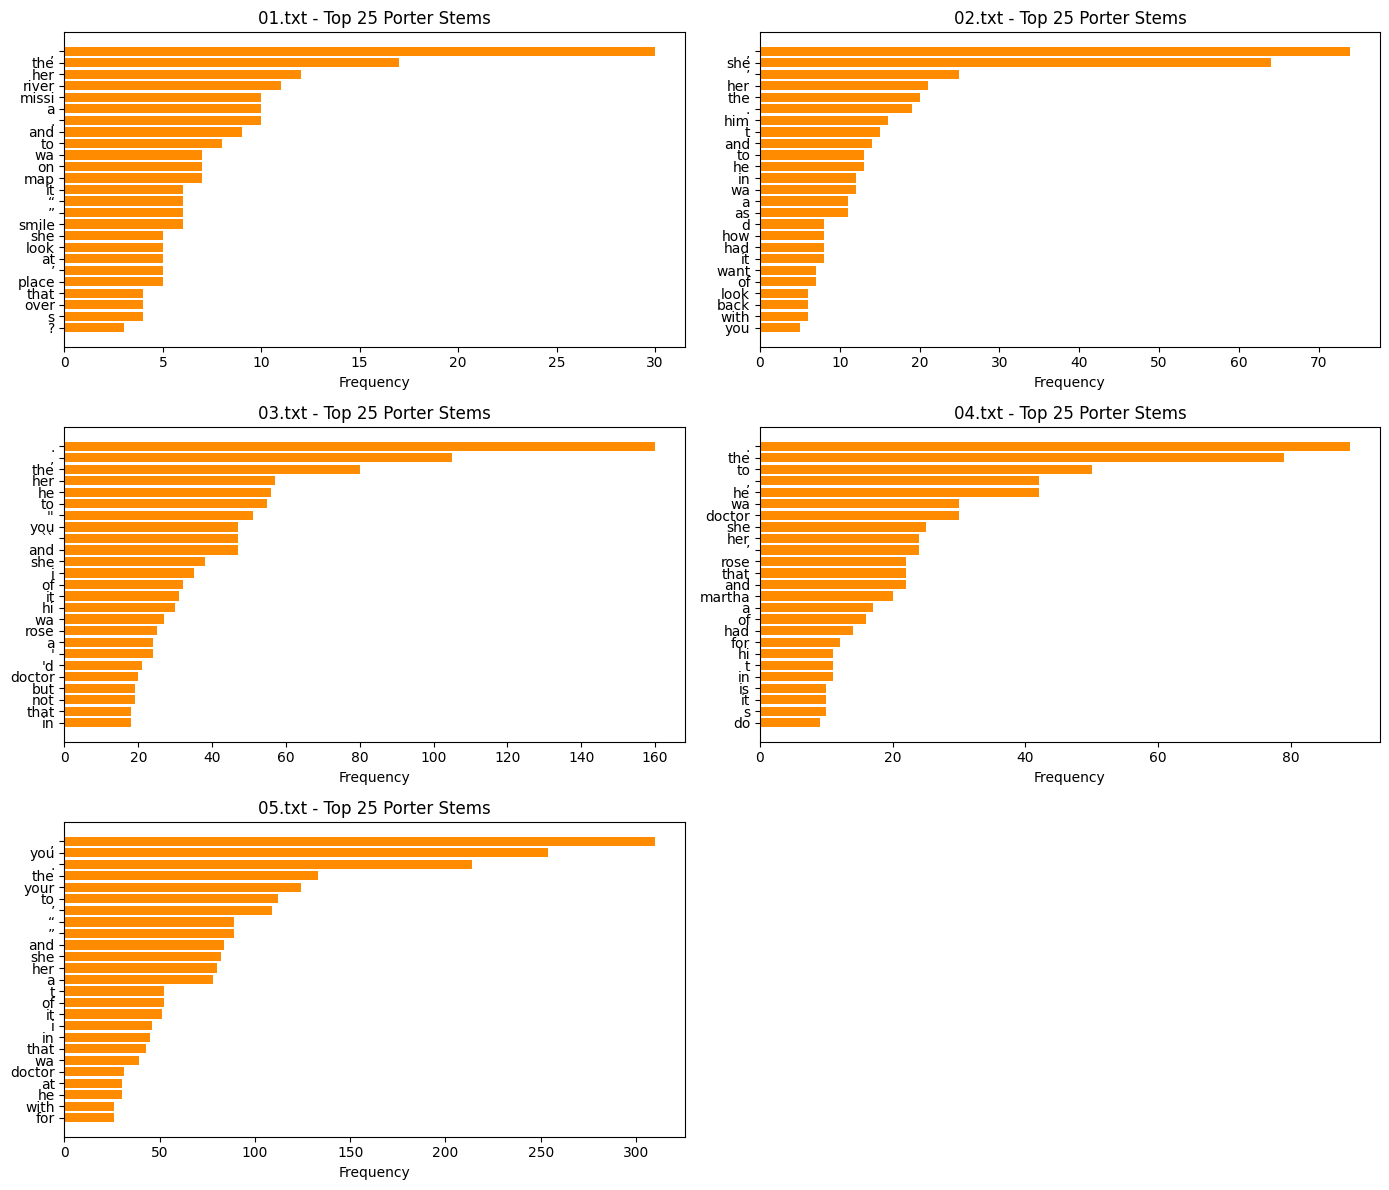

In [14]:
# HISTOGRAMS: TOP 25 PORTER STEMS PER STORY

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (filename, freq) in enumerate(porter_freq.items()):
    top_25 = freq.most_common(25)
    words = [word for word, count in top_25]
    counts = [count for word, count in top_25]
    
    axes[idx].barh(words, counts, color='darkorange')
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_title(f'{filename} - Top 25 Porter Stems')
    axes[idx].invert_yaxis()

axes[5].axis('off')
plt.tight_layout()
plt.show()

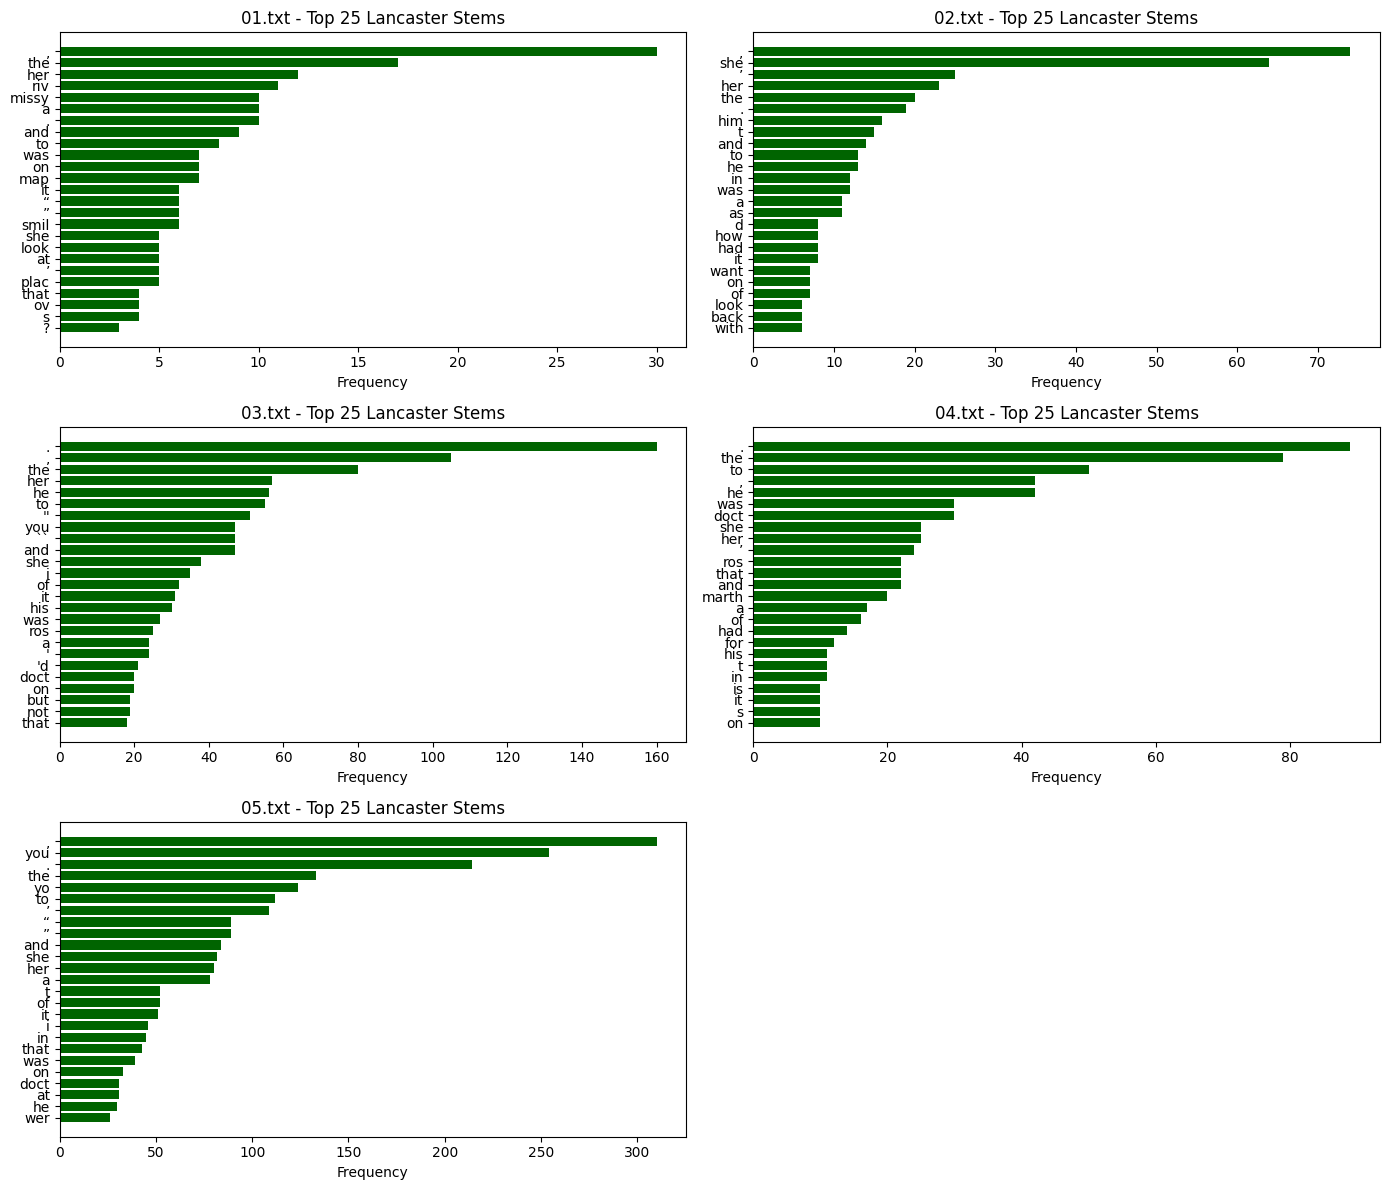

In [15]:
# HISTOGRAMS: TOP 25 LANCASTER STEMS PER STORY

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (filename, freq) in enumerate(lancaster_freq.items()):
    top_25 = freq.most_common(25)
    words = [word for word, count in top_25]
    counts = [count for word, count in top_25]
    
    axes[idx].barh(words, counts, color='darkgreen')
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_title(f'{filename} - Top 25 Lancaster Stems')
    axes[idx].invert_yaxis()

axes[5].axis('off')
plt.tight_layout()
plt.show()

## POS-Tagging Analysis (Tom Sawyer - 3 Languages)

In [16]:
# SPACY SETUP

import spacy

# Load language models
nlp_en = spacy.load('en_core_web_sm')
nlp_nl = spacy.load('nl_core_news_sm')
nlp_de = spacy.load('de_core_news_sm')

print("spaCy models loaded successfully")
print(f"  - English: {nlp_en.meta['name']}")
print(f"  - Dutch: {nlp_nl.meta['name']}")
print(f"  - German: {nlp_de.meta['name']}")

spaCy models loaded successfully!
  - English: core_web_sm
  - Dutch: core_news_sm
  - German: core_news_sm


In [17]:
# LOAD TOM SAWYER FILES

tom_sawyer_path = '../data/Part_2/'

# Dictionary with filename and language info
tom_sawyer_files = {
    'pg74.txt': {'language': 'English', 'nlp': nlp_en},
    'pg18381.txt': {'language': 'Dutch', 'nlp': nlp_nl},
    'pg30165.txt': {'language': 'German', 'nlp': nlp_de}
}

# Load the files
tom_sawyer_texts = {}

for filename, info in tom_sawyer_files.items():
    filepath = os.path.join(tom_sawyer_path, filename)
    with open(filepath, 'r', encoding='utf-8') as f:
        tom_sawyer_texts[filename] = {
            'content': f.read(),
            'language': info['language'],
            'nlp': info['nlp']
        }

# Verify files loaded
print("Tom Sawyer files loaded:")
for filename, data in tom_sawyer_texts.items():
    print(f"  - {filename} ({data['language']}): {len(data['content'])} characters")

Tom Sawyer files loaded:
  - pg74.txt (English): 412054 characters
  - pg18381.txt (Dutch): 451878 characters
  - pg30165.txt (German): 443646 characters


In [18]:
# PREVIEW FILES - Check preamble and structure

# Preview first 2000 characters of each file to see what needs cleaning
for filename, data in tom_sawyer_texts.items():
    print(f"\n{'='*60}")
    print(f"PREVIEW: {filename} ({data['language']})")
    print('='*60)
    print(data['content'][:2000])
    print("\n[...]")


PREVIEW: pg74.txt (English)
﻿The Project Gutenberg eBook of The Adventures of Tom Sawyer, Complete
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Adventures of Tom Sawyer, Complete

Author: Mark Twain

Release date: July 1, 2004 [eBook #74]
                Most recently updated: August 9, 2023

Language: English

Credits: David Widger


*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER, COMPLETE ***




THE ADVENTURES OF TOM SAWYER


By Mark Twain

(Samuel Langhorne Clemens)




CONTENTS


CHAPTER I. Y-o-u-u Tom—Aunt Polly Decides Upon her Duty—Tom Practices
M

In [20]:
# CLEAN TEXTS - Remove Project Gutenberg preamble and licensing

def clean_gutenberg_text(text, language):
    """Remove Project Gutenberg preamble and licensing information."""
    
    # Step 1: Remove everything after END marker
    end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK"
    end_idx = text.find(end_marker)
    if end_idx != -1:
        text = text[:end_idx]
    
    # Step 2: Find the start of actual content (Chapter 1 in each language)
    chapter_markers = {
        'English': 'CHAPTER I.',
        'Dutch': 'HOOFDSTUK I.',
        'German': 'Erstes Kapitel'
    }
    
    marker = chapter_markers.get(language)
    if marker:
        start_idx = text.find(marker)
        if start_idx != -1:
            text = text[start_idx:]
    
    # Remove extra whitespace
    text = text.strip()
    
    return text

# Apply cleaning to all texts
for filename, data in tom_sawyer_texts.items():
    original_length = len(data['content'])
    data['content'] = clean_gutenberg_text(data['content'], data['language'])
    cleaned_length = len(data['content'])
    
    print(f"{filename} ({data['language']}):")
    print(f" Original: {original_length} characters")
    print(f" Cleaned:  {cleaned_length} characters")
    print(f" Removed:  {original_length - cleaned_length} characters")
    print()

pg74.txt (English):
 Original: 392642 characters
 Cleaned:  392642 characters
 Removed:  0 characters

pg18381.txt (Dutch):
 Original: 432078 characters
 Cleaned:  432078 characters
 Removed:  0 characters

pg30165.txt (German):
 Original: 422897 characters
 Cleaned:  422897 characters
 Removed:  0 characters



In [21]:
# VERIFY CLEANING - Preview start AND end of cleaned texts

for filename, data in tom_sawyer_texts.items():
    print(f"\n{'='*60}")
    print(f"{filename} ({data['language']})")
    print('='*60)
    print("FIRST 300 chars:")
    print(data['content'][:300])
    print(f"\n{'-'*40}")
    print("LAST 300 chars:")
    print(data['content'][-300:])


pg74.txt (English)
FIRST 300 chars:
CHAPTER I. Y-o-u-u Tom—Aunt Polly Decides Upon her Duty—Tom Practices
Music—The Challenge—A Private Entrance

CHAPTER II. Strong Temptations—Strategic Movements—The Innocents
Beguiled

CHAPTER III. Tom as a General—Triumph and Reward—Dismal
Felicity—Commission and Omission

CHAPTER IV. Mental Acroba

----------------------------------------
LAST 300 chars:
aracters that perform in this book still live, and are
prosperous and happy. Some day it may seem worth while to take up the
story of the younger ones again and see what sort of men and women they
turned out to be; therefore it will be wisest not to reveal any of that
part of their lives at present.

pg18381.txt (Dutch)
FIRST 300 chars:
HOOFDSTUK I.


"Tom!"

Geen antwoord.

"Tom!"

Geen antwoord.

"Waar zou die drommelsche jongen toch zitten? Hoor je me niet, Tom?"

De oude dame, die deze woorden sprak, trok haar bril naar beneden
om er overheen te kijken. Daarna duwde zij hem naar boven om er
on

In [22]:
# POS-TAGGING WITH SPACY

# Note: This may take a minute to process (large texts)

pos_frequencies = {}

for filename, data in tom_sawyer_texts.items():
    print(f"Processing {filename} ({data['language']})...")
    
    # Get the appropriate language model
    nlp = data['nlp']
    
    # Increase max_length if needed (default is 1,000,000)
    nlp.max_length = 500000
    
    # Process the text
    doc = nlp(data['content'])
    
    # Extract POS tags and count frequencies
    pos_tags = [token.pos_ for token in doc]
    pos_frequencies[data['language']] = Counter(pos_tags)
    
    print(f"  Done! {len(doc)} tokens processed.")

print("\nPOS-tagging complete for all languages")

Processing pg74.txt (English)...
  Done! 96592 tokens processed.
Processing pg18381.txt (Dutch)...
  Done! 95535 tokens processed.
Processing pg30165.txt (German)...
  Done! 92470 tokens processed.

POS-tagging complete for all languages!


In [24]:
# POS TAG FREQUENCIES - Display Results

for language, freq in pos_frequencies.items():
    print(f"\n{'='*30}")
    print(f"POS Tag Frequencies: {language}")
    print('='*30)
    
    # Sort by frequency (descending)
    for tag, count in freq.most_common():
        print(f"  {tag:<10} : {count:>6}")


POS Tag Frequencies: English
  PUNCT      :  15467
  NOUN       :  12252
  VERB       :  11368
  PRON       :  10301
  ADP        :   7349
  DET        :   6980
  SPACE      :   6625
  ADV        :   4896
  ADJ        :   4431
  AUX        :   4390
  CCONJ      :   3864
  PROPN      :   3541
  PART       :   2120
  SCONJ      :   1810
  NUM        :    649
  INTJ       :    475
  X          :     73
  SYM        :      1

POS Tag Frequencies: Dutch
  PUNCT      :  13947
  NOUN       :  11920
  VERB       :  11768
  PRON       :  10021
  ADP        :   8793
  SPACE      :   7216
  DET        :   7114
  ADV        :   5761
  ADJ        :   5048
  AUX        :   3839
  CCONJ      :   3503
  PROPN      :   3474
  SCONJ      :   1999
  NUM        :    391
  INTJ       :    365
  SYM        :    353
  X          :     23

POS Tag Frequencies: German
  PUNCT      :  18397
  NOUN       :  11099
  VERB       :   9468
  ADV        :   9266
  PRON       :   8771
  DET        :   7449
  SPACE    

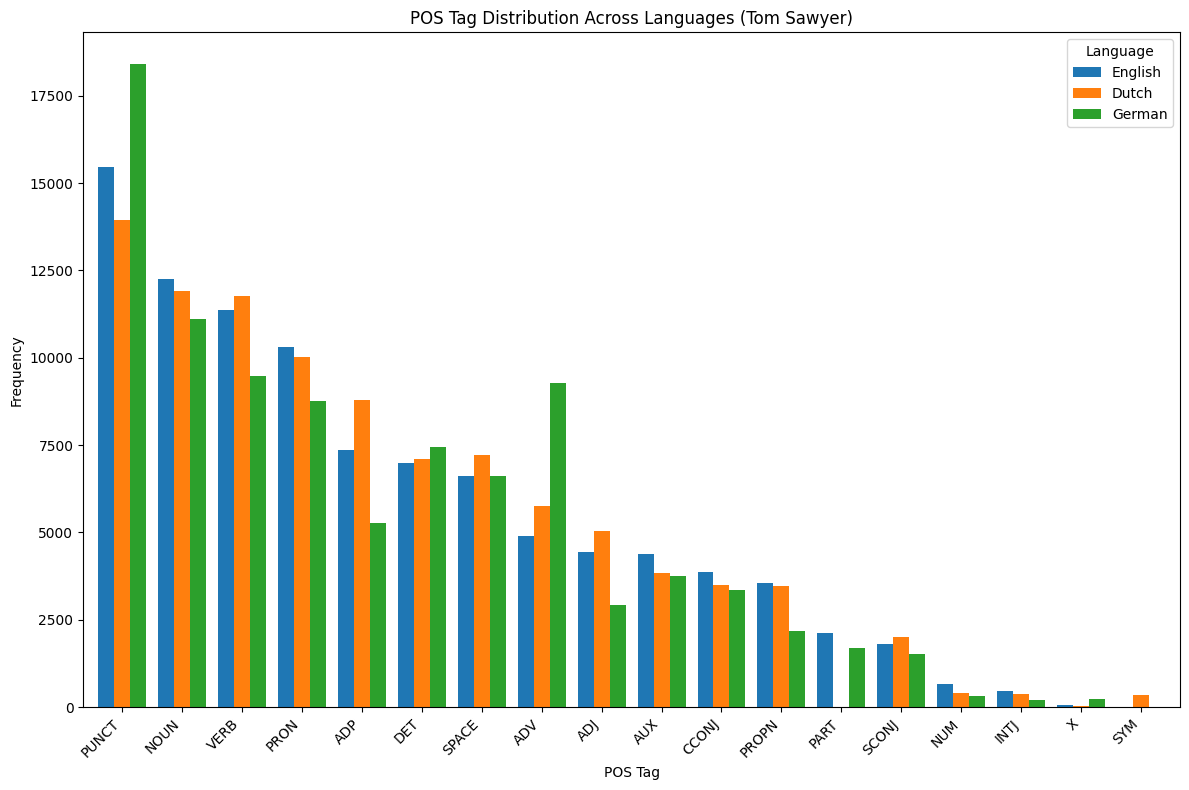


POS Tag Frequencies Table:
       English  Dutch  German
PUNCT    15467  13947   18397
NOUN     12252  11920   11099
VERB     11368  11768    9468
PRON     10301  10021    8771
ADP       7349   8793    5268
DET       6980   7114    7449
SPACE     6625   7216    6630
ADV       4896   5761    9266
ADJ       4431   5048    2914
AUX       4390   3839    3740
CCONJ     3864   3503    3356
PROPN     3541   3474    2181
PART      2120      0    1679
SCONJ     1810   1999    1514
NUM        649    391     309
INTJ       475    365     208
X           73     23     221
SYM          1    353       0


In [25]:
# COMPARATIVE HISTOGRAM: POS TAGS ACROSS LANGUAGES

import pandas as pd

# Create a DataFrame for easier comparison
df_pos = pd.DataFrame(pos_frequencies).fillna(0).astype(int)
df_pos = df_pos.sort_values(by='English', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

df_pos.plot(kind='bar', ax=ax, width=0.8)

ax.set_xlabel('POS Tag')
ax.set_ylabel('Frequency')
ax.set_title('POS Tag Distribution Across Languages (Tom Sawyer)')
ax.legend(title='Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Also display the DataFrame
print("\nPOS Tag Frequencies Table:")
print(df_pos)

# Part II: Named Entity Recognition (NER)

In [26]:
# NER SETUP - Using English model

# We already have nlp_en loaded from Part 1.3
# If not, uncomment the following:
# nlp_en = spacy.load('en_core_web_sm')

print("English model ready for NER")
print(f"NER labels available: {nlp_en.pipe_labels['ner']}")

English model ready for NER
NER labels available: ['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [27]:
# PREVIEW: Find sentences with named entities in each story

for filename, content in texts.items():
    print(f"\n{'='*60}")
    print(f"FILE: {filename}")
    print('='*60)
    
    # Process full document
    doc = nlp_en(content)
    
    # Find sentences that contain entities
    sentences_with_entities = []
    for sent in doc.sents:
        ents = [ent for ent in sent.ents]
        if ents:
            sentences_with_entities.append((sent.text.strip(), ents))
    
    # Show first 3 sentences with entities
    print(f"Total sentences with entities: {len(sentences_with_entities)}")
    print("\nFirst 3 sentences with detected entities:")
    for i, (sent_text, ents) in enumerate(sentences_with_entities[:3]):
        print(f"\n  Sentence {i+1}: \"{sent_text}\"")
        print(f"  Entities found:")
        for ent in ents:
            print(f"    - \"{ent.text}\" → {ent.label_}")


FILE: 01.txt
Total sentences with entities: 7

First 3 sentences with detected entities:

  Sentence 1: "Bones_Bard 

---

Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful."
  Entities found:
    - "Missy" → PERSON
    - "River" → LOC

  Sentence 2: "She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps."
  Entities found:
    - "Missy" → PERSON
    - "Mary Poppins" → PERSON
    - "River" → LOC

  Sentence 3: "Missy smiles and leans back, placing a kiss on River’s jaw, a smile on her face, River reaches onto the table for a cup of coffee, gracefully sitting herself on the chair next to Missy, she raises the cups to her lips, wondering wether Missy had noticed yet."
  Entities found:
    - "River" → PRODUCT
    - "River" → LOC
  

In [28]:
# SELECT SENTENCES FOR MANUAL ANNOTATION

# Store selected sentences for comparison
selected_sentences = {}

for filename, content in texts.items():
    doc = nlp_en(content)
    
    # Find sentences with entities (preferably with PERSON or LOC for interesting comparison)
    sentences_with_entities = []
    for sent in doc.sents:
        ents = [ent for ent in sent.ents]
        if ents and len(sent.text.strip()) < 300:  # Avoid very long sentences
            sentences_with_entities.append({
                'text': sent.text.strip(),
                'auto_entities': [(ent.text, ent.label_) for ent in ents]
            })
    
    # Select first 2 sentences with entities
    selected_sentences[filename] = sentences_with_entities[:2]

# Display selected sentences
for filename, sentences in selected_sentences.items():
    print(f"\n{'='*60}")
    print(f"FILE: {filename}")
    print('='*60)
    
    for i, sent_data in enumerate(sentences):
        print(f"\nSentence {i+1}:")
        print(f"  \"{sent_data['text']}\"")
        print(f"\n  Automatic NER results:")
        for ent_text, ent_label in sent_data['auto_entities']:
            print(f"    - \"{ent_text}\" → {ent_label}")


FILE: 01.txt

Sentence 1:
  "Bones_Bard 

---

Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful."

  Automatic NER results:
    - "Missy" → PERSON
    - "River" → LOC

Sentence 2:
  "She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps."

  Automatic NER results:
    - "Missy" → PERSON
    - "Mary Poppins" → PERSON
    - "River" → LOC

FILE: 02.txt

Sentence 1:
  "She took a book from her bedside table, she was surrounded by them these day, she whispered to herself."

  Automatic NER results:
    - "these day" → DATE

Sentence 2:
  "Fall in love with who you'll one day be, but please, don't fall so hard

She heard something, a teleport, she raced out, even after a few years, she was just as fast as she used to be."

  Automatic

In [30]:
# MANUAL ANNOTATION vs AUTOMATIC NER

# Comparison table: Manual annotations vs Automatic results
comparison_data = [
    {
        'file': '01.txt',
        'sentence': 'Missy was sitting on a chair in a house, maps and papers spread around...',
        'automatic': [('Missy', 'PERSON'), ('River', 'LOC')],
        'manual': [('Missy', 'PERSON'), ('River', 'PERSON')],
        'notes': 'River incorrectly labeled as LOC instead of PERSON'
    },
    {
        'file': '01.txt',
        'sentence': 'She was wearing a t-shirt that drenched her form...',
        'automatic': [('Missy', 'PERSON'), ('Mary Poppins', 'PERSON'), ('River', 'LOC')],
        'manual': [('Missy', 'PERSON'), ('Mary Poppins', 'PERSON'), ('River', 'PERSON')],
        'notes': 'River again incorrectly labeled as LOC'
    },
    {
        'file': '02.txt',
        'sentence': 'She took a book from her bedside table...',
        'automatic': [('these day', 'DATE')],
        'manual': [],
        'notes': 'False positive: "these day" is not a meaningful named entity'
    },
    {
        'file': '02.txt',
        'sentence': 'Fall in love with who you\'ll one day be...',
        'automatic': [('one day', 'DATE'), ('a few years', 'DATE')],
        'manual': [],
        'notes': 'These are temporal expressions, not named entities in context'
    },
    {
        'file': '03.txt',
        'sentence': 'My Doctor. Even as the regeneration energy continues...',
        'automatic': [('Rose Tyler', 'PERSON')],
        'manual': [('Doctor', 'PERSON'), ('Rose Tyler', 'PERSON')],
        'notes': 'Missed "Doctor" as a character name (PERSON)'
    },
    {
        'file': '03.txt',
        'sentence': '"My Doctor."',
        'automatic': [('My Doctor', 'WORK_OF_ART')],
        'manual': [('Doctor', 'PERSON')],
        'notes': 'Incorrectly labeled as WORK_OF_ART instead of PERSON'
    },
    {
        'file': '04.txt',
        'sentence': 'The Doctor had no clue how he could live life again without Rose.',
        'automatic': [('Rose', 'PERSON')],
        'manual': [('Doctor', 'PERSON'), ('Rose', 'PERSON')],
        'notes': 'Missed "Doctor" as PERSON'
    },
    {
        'file': '04.txt',
        'sentence': 'After the Time War, the Doctor felt torn apart inside.',
        'automatic': [('the Time War', 'EVENT')],
        'manual': [('Time War', 'EVENT'), ('Doctor', 'PERSON')],
        'notes': 'Correctly identified Time War, but missed Doctor as PERSON'
    },
    {
        'file': '05.txt',
        'sentence': 'Since you two parted ways, you tried to be more like her.',
        'automatic': [('two', 'CARDINAL')],
        'manual': [],
        'notes': 'False positive: "two" is just a number, not a named entity'
    },
    {
        'file': '05.txt',
        'sentence': 'To put it in simple words, if somebody threatened to punch you or the Doctor...',
        'automatic': [('first', 'ORDINAL')],
        'manual': [('Doctor', 'PERSON')],
        'notes': 'Missed "Doctor" as PERSON, detected irrelevant "first"'
    }
]

# Display comparison
print("NER COMPARISON: AUTOMATIC vs MANUAL ANNOTATION")

for item in comparison_data:
    print(f"\n[{item['file']}]")
    print(f"Sentence: \"{item['sentence'][:70]}...\"")
    print(f"  Automatic: {item['automatic']}")
    print(f"  Manual:    {item['manual']}")
    print(f"  Notes:     {item['notes']}")

NER COMPARISON: AUTOMATIC vs MANUAL ANNOTATION

[01.txt]
Sentence: "Missy was sitting on a chair in a house, maps and papers spread around..."
  Automatic: [('Missy', 'PERSON'), ('River', 'LOC')]
  Manual:    [('Missy', 'PERSON'), ('River', 'PERSON')]
  Notes:     River incorrectly labeled as LOC instead of PERSON

[01.txt]
Sentence: "She was wearing a t-shirt that drenched her form......"
  Automatic: [('Missy', 'PERSON'), ('Mary Poppins', 'PERSON'), ('River', 'LOC')]
  Manual:    [('Missy', 'PERSON'), ('Mary Poppins', 'PERSON'), ('River', 'PERSON')]
  Notes:     River again incorrectly labeled as LOC

[02.txt]
Sentence: "She took a book from her bedside table......"
  Automatic: [('these day', 'DATE')]
  Manual:    []
  Notes:     False positive: "these day" is not a meaningful named entity

[02.txt]
Sentence: "Fall in love with who you'll one day be......"
  Automatic: [('one day', 'DATE'), ('a few years', 'DATE')]
  Manual:    []
  Notes:     These are temporal expressions, not nam

### Part II: NER Analysis - Observations

**How good or bad is the automatic NER method?**

Based on the comparison between automatic and manual annotations, the spaCy model shows mixed performance:

**Correct detections:**
- "Missy" correctly identified as PERSON
- "Rose Tyler" and "Rose" correctly identified as PERSON
- "Mary Poppins" correctly identified as PERSON
- "Time War" correctly identified as EVENT

**Errors found:**

| Error Type | Example | Problem |
|------------|---------|---------|
| Wrong label | "River" → LOC | Should be PERSON (character name) |
| Wrong label | "My Doctor" → WORK_OF_ART | Should be PERSON |
| Missed entity | "Doctor" not detected | Important character not recognized |
| False detection | "two", "first" | Numbers detected as entities but not meaningful |
| False detection | "one day", "these day" | Temporal expressions, not true named entities |